In [1]:
#Just in Case
import warnings
warnings.filterwarnings('ignore')

#Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm

from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.preprocessing import label_binarize
from mlxtend.plotting import plot_decision_regions


In [2]:
#Estableciendo el directorio de trabajo
os.chdir('D:\Social Data Consulting\Python for Data Science\data')

In [3]:
mifichero="diabetes_py.xlsx"
diabetes=pd.read_excel(mifichero)
diabetes.head()

,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157


In [4]:
#Dimensiones
diabetes.shape

(115, 4)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   clase     115 non-null    int64
 1   glucosa   115 non-null    int64
 2   insulina  115 non-null    int64
 3   sspg      115 non-null    int64
dtypes: int64(4)
memory usage: 3.7 KB


In [6]:
#Frecuencias por clases
pd.value_counts(diabetes.clase)

1    66
2    26
3    23
Name: clase, dtype: int64

#### _Particionamiento de los Datos considerando(momentaneamente) 2 predictores (glucosa e insulina)_

In [7]:
x=diabetes.iloc[:,1:3].values
y=diabetes.iloc[:,0].values

In [8]:
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2020)

#### _Modelo de Arbol_

In [9]:
tree=DecisionTreeClassifier(criterion='entropy',
                           min_samples_split=20,
                           max_depth=3,
                           random_state=2020)

#### _Validación Cruzada (Analizando la consistencia interna de la variabilidad del árbol)_

In [10]:
score=cross_val_score(tree, # Estimator
                     XTRAIN, #Matriz de Datos
                     YTRAIN, #Target
                     scoring='accuracy', #Metrica de referencia
                     cv=10) #Numero de particiones

In [11]:
score

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.875,
       1.   ])

#### _Continuando con el Modelo_

In [12]:
tree.fit(XTRAIN,YTRAIN)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=20,
                       random_state=2020)

In [13]:
#Combinando datos
x_combined=np.vstack((XTRAIN,XTEST))
y_combined=np.hstack((YTRAIN,YTEST))

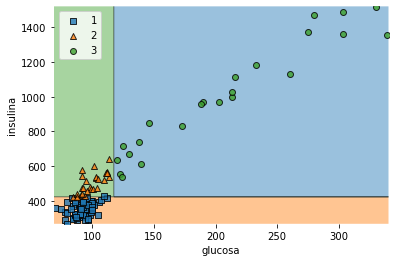

In [14]:
#Visualizando regiones de decisión
plot_decision_regions(x_combined,y_combined, clf=tree)
plt.xlabel('glucosa')
plt.ylabel('insulina')
plt.legend(loc='upper left')
plt.show()

In [15]:
x=diabetes.iloc[:,1:4].values
y=diabetes.iloc[:,0].values

In [16]:
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(x,y,test_size=0.3,stratify=y,random_state=2020)

In [17]:
x_t=pd.DataFrame(XTRAIN,columns=['glucosa','insulina','sspg'])
y_t=pd.DataFrame(YTRAIN,columns=['clase'])
diabetes_entrenamiento=pd.concat([x_t,y_t],axis=1)
diabetes_entrenamiento.head()

,glucosa,insulina,sspg,clase
0,93,306,220,1
1,339,1354,10,3
2,93,376,195,1
3,95,391,137,1
4,92,386,279,1


In [18]:
columnas=diabetes_entrenamiento.columns.to_list()
columnas

['glucosa', 'insulina', 'sspg', 'clase']

In [19]:
predictores=columnas[0:3]
target=columnas[3]
print(predictores)
print(target)

['glucosa', 'insulina', 'sspg']
clase


In [20]:
#Instanciamos un objeto de clase DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',
                           min_samples_split=20,
                           max_depth=3,
                           random_state=2020)

In [21]:
#Aprendemos de los datos de entrenamiento
tree=tree.fit(XTRAIN,YTRAIN)

In [22]:
#Iniciando proceso de grafica
with open('diabetes_dtree.dot','w') as dotfile : #W viene de write para escritura sobre el objeto
    export_graphviz(tree,
                    out_file=dotfile,
                    feature_names=predictores)
    dotfile.close()

In [23]:
#Leyendo el archivo creado
file=open('diabetes_dtree.dot','r') #r viene de read
text=file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="insulina <= 420.5\\nentropy = 1.408\\nsamples = 80\\nvalue = [46, 18, 16]"] ;\n1 [label="entropy = 0.0\\nsamples = 46\\nvalue = [46, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="glucosa <= 117.0\\nentropy = 0.998\\nsamples = 34\\nvalue = [0, 18, 16]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 16\\nvalue = [0, 0, 16]"] ;\n2 -> 4 ;\n}'

In [24]:
from graphviz import Source

In [25]:
os.getcwd()

'D:\\Social Data Consulting\\Python for Data Science\\data'

In [26]:
os.environ['path']

'D:\\Anaconda;D:\\Anaconda\\Library\\mingw-w64\\bin;D:\\Anaconda\\Library\\usr\\bin;D:\\Anaconda\\Library\\bin;D:\\Anaconda\\Scripts;C:\\Program Files\\Common Files\\Oracle\\Java\\javapath;D:\\ORACLE\\app\\oracle\\product\\11.2.0\\server\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C: \\ MinGW \\ bin;C: \\ MinGW \\ msys \\ 1.0 \\ bin;C:\\ProgramData\\chocolatey\\bin;C:\\Program Files\\Apache Software Foundation\\Tomcat 9.0\\bin;C:\\Program Files\\nodejs\\;D:\\Rational\\common;C:\\Program Files\\Microsoft SQL Server Migration Assistant for Access\\bin\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;D:\\xampp\\php;C:\\composer;C:\\xampp\\php;C:\\Program Files\\Git\\cmd;D:\\Anaconda\\envs\\rstudio\\lib\\R\\bin\\R.exe;C:\\Program Files\\Graphviz2.38\\bin;C:\\Program Files\\MySQL\\MySQL Shell 8.0\\bin\\;C:\\Users\\Diego León\\AppData\\Roaming\\npm;C:\\WINDOWS\\System32\\Wi

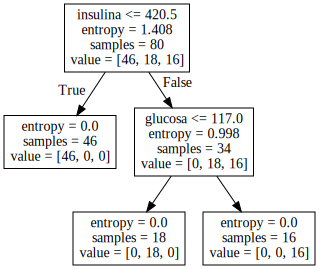

In [27]:
#Visualizando el grafico de arbol
Source(text)

#### Accuracy

In [28]:
#Para Datos de entrenamiento
tree.score(XTRAIN,YTRAIN)

1.0

In [29]:
#Para datos de testeo
tree.score(XTEST,YTEST)

0.9714285714285714

In [31]:
ypredicho_train=tree.predict(XTRAIN)
ypredicho_train

array([1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 2,
       2, 3, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 3, 1], dtype=int64)

#### Binarizamos la target para los datos de entrenamiento y el ypredicho para construir la matriz de confusion

In [34]:
y_bin=label_binarize(YTRAIN,classes=[1,2,3])
y_bin[0:5]

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [35]:
ypredicho_bin=label_binarize(ypredicho_train,classes=[1,2,3])
ypredicho_bin[0:5]

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [37]:
cm_train1=confusion_matrix(y_bin[:,0],ypredicho_bin[:,0])
cm_train1

array([[34,  0],
       [ 0, 46]], dtype=int64)

In [39]:
for i in range(y_bin.shape[1]):
    print('La matriz de confusion para la clase ',i+1)
    print(confusion_matrix(y_bin[:,i],ypredicho_bin[:,i]))

La matriz de confusion para la clase  1
[[34  0]
 [ 0 46]]
La matriz de confusion para la clase  2
[[62  0]
 [ 0 18]]
La matriz de confusion para la clase  3
[[64  0]
 [ 0 16]]


#### Binarizamos la target para los datos de testeo y el ypredicho para construir la matriz de confusion

In [42]:
y_bin_test=label_binarize(YTEST,classes=[1,2,3])
y_bin_test[0:5]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [43]:
ypredicho_test=tree.predict(XTEST)
ypredicho_bin_test=label_binarize(ypredicho_test,classes=[1,2,3])
ypredicho_bin_test[0:5]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [45]:
for i in range(y_bin.shape[1]):
    print('La matriz de confusion para la clase ',i+1)
    print(confusion_matrix(y_bin_test[:,i],ypredicho_bin_test[:,i]))

La matriz de confusion para la clase  1
[[15  0]
 [ 1 19]]
La matriz de confusion para la clase  2
[[26  1]
 [ 0  8]]
La matriz de confusion para la clase  3
[[28  0]
 [ 0  7]]
